# Teste De Correlação

In [39]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

data = [(Vectors.sparse(4, [(0, 1.0), (3, -2.0)]),),
        (Vectors.dense([4.0, 5.0, 0.0, 3.0]),),
        (Vectors.dense([6.0, 7.0, 0.0, 8.0]),),
        (Vectors.sparse(4, [(0, 9.0), (3, 1.0)]),)]
df = spark.createDataFrame(data, ["features"])

r1 = Correlation.corr(df, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))

r2 = Correlation.corr(df, "features", "spearman").head()
print("Spearman correlation matrix:\n" + str(r2[0]))

Pearson correlation matrix:
DenseMatrix([[1.        , 0.05564149,        nan, 0.40047142],
             [0.05564149, 1.        ,        nan, 0.91359586],
             [       nan,        nan, 1.        ,        nan],
             [0.40047142, 0.91359586,        nan, 1.        ]])
Spearman correlation matrix:
DenseMatrix([[1.        , 0.10540926,        nan, 0.4       ],
             [0.10540926, 1.        ,        nan, 0.9486833 ],
             [       nan,        nan, 1.        ,        nan],
             [0.4       , 0.9486833 ,        nan, 1.        ]])


# PCA

In [105]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

data = [(Vectors.sparse(5, [(1, 1.0), (3, 7.0)]),),
        (Vectors.dense([2.0, 0.0, 3.0, 4.0, 5.0]),),
        (Vectors.dense([4.0, 0.0, 0.0, 6.0, 7.0]),)]

df = spark.createDataFrame(data, ["features"])

pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df)

result = model.transform(df).select("pcaFeatures")

result.show(truncate=False)

+-----------------------------------------------------------+
|pcaFeatures                                                |
+-----------------------------------------------------------+
|[1.6485728230883807,-4.013282700516296,-5.524543751369388] |
|[-4.645104331781534,-1.1167972663619026,-5.524543751369387]|
|[-6.428880535676489,-5.337951427775355,-5.524543751369389] |
+-----------------------------------------------------------+



# Teste De Chi2

In [15]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import ChiSquareTest

data = [(0.0, Vectors.dense(0.5, 10.0)),
        (0.0, Vectors.dense(1.5, 20.0)),
        (1.0, Vectors.dense(1.5, 30.0)),
        (0.0, Vectors.dense(3.5, 30.0)),
        (0.0, Vectors.dense(3.5, 40.0)),
        (1.0, Vectors.dense(3.5, 40.0))]
df = spark.createDataFrame(data, ["label", "features"])

r = ChiSquareTest.test(df, "features", "label").head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

pValues: [0.6872892787909721,0.6822703303362126]
degreesOfFreedom: [2, 3]
statistics: [0.75,1.5]


In [16]:
df.show()

+-----+----------+
|label|  features|
+-----+----------+
|  0.0|[0.5,10.0]|
|  0.0|[1.5,20.0]|
|  1.0|[1.5,30.0]|
|  0.0|[3.5,30.0]|
|  0.0|[3.5,40.0]|
|  1.0|[3.5,40.0]|
+-----+----------+



# Criando Pipeline

In [38]:
# from pyspark.ml import Pipeline

# from pyspark.ml.classification import LogisticRegression

# pipeline = Pipeline(stages=[one, std, lr])

# model = pipeline.fit(training)

# prediction = model.transform(test)

# result = prediction.select("id", "text", "probability", "prediction").collect()


# Escala Polinomial - PolynomialFeatures

In [40]:
from pyspark.ml.feature import PolynomialExpansion
from pyspark.ml.linalg import Vectors

df = spark.createDataFrame([
    (Vectors.dense([2.0, 1.0]),),
    (Vectors.dense([0.0, 0.0]),),
    (Vectors.dense([3.0, -1.0]),)
], ["features"])

polyExpansion = PolynomialExpansion(degree=3, inputCol="features", outputCol="polyFeatures")
polyDF = polyExpansion.transform(df)

polyDF.show(truncate=False)

+----------+------------------------------------------+
|features  |polyFeatures                              |
+----------+------------------------------------------+
|[2.0,1.0] |[2.0,4.0,8.0,1.0,2.0,4.0,1.0,2.0,1.0]     |
|[0.0,0.0] |[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]     |
|[3.0,-1.0]|[3.0,9.0,27.0,-1.0,-3.0,-9.0,1.0,3.0,-1.0]|
+----------+------------------------------------------+



# Encoders

## Label Encoder - StringIndexer(transforma determinadas colunas categoricas)

In [41]:
from pyspark.ml.feature import StringIndexer

df = spark.createDataFrame(
    [(0, "a"), (1, "b"), (2, "c"), (3, "a"), (4, "a"), (5, "c")],
    ["id", "category"])

indexer = StringIndexer(inputCol="category", outputCol="categoryIndex")
indexed = indexer.fit(df).transform(df)
indexed.show()

+---+--------+-------------+
| id|category|categoryIndex|
+---+--------+-------------+
|  0|       a|          0.0|
|  1|       b|          2.0|
|  2|       c|          1.0|
|  3|       a|          0.0|
|  4|       a|          0.0|
|  5|       c|          1.0|
+---+--------+-------------+



### Retorna do Label Encoder -

In [43]:
from pyspark.ml.feature import IndexToString
converter = IndexToString(inputCol="categoryIndex", outputCol="originalCategory")
converted = converter.transform(indexed)
converted.show()

+---+--------+-------------+----------------+
| id|category|categoryIndex|originalCategory|
+---+--------+-------------+----------------+
|  0|       a|          0.0|               a|
|  1|       b|          2.0|               b|
|  2|       c|          1.0|               c|
|  3|       a|          0.0|               a|
|  4|       a|          0.0|               a|
|  5|       c|          1.0|               c|
+---+--------+-------------+----------------+



## OneHotEncoder

In [47]:
from pyspark.ml.feature import OneHotEncoder

df = spark.createDataFrame(
    [(0, "a"), (1, "b"), (2, "c"), (3, "a"), (4, "a"), (5, "c")],
    ["id", "category"])

# Necessário usar label encoder antes
indexer = StringIndexer(inputCol="category", outputCol="categoryIndex")

indexed = indexer.fit(df).transform(df)


encoder = OneHotEncoder(inputCols=["categoryIndex"],
                        outputCols=['Encoder'])

model = encoder.fit(indexed)

encoded = model.transform(indexed)

encoded.show()

+---+--------+-------------+-------------+
| id|category|categoryIndex|      Encoder|
+---+--------+-------------+-------------+
|  0|       a|          0.0|(2,[0],[1.0])|
|  1|       b|          2.0|    (2,[],[])|
|  2|       c|          1.0|(2,[1],[1.0])|
|  3|       a|          0.0|(2,[0],[1.0])|
|  4|       a|          0.0|(2,[0],[1.0])|
|  5|       c|          1.0|(2,[1],[1.0])|
+---+--------+-------------+-------------+



## VectorIndexer Analisa Se Determinadas Colunas São Categoricas De Acordo Com Seu Dados Repetidos

In [59]:
from pyspark.ml.feature import VectorIndexer

data = spark.read.format("libsvm").load("C:/BigDataLocalSetup/spark/data/mllib/sample_libsvm_data.txt")

indexer = VectorIndexer(inputCol="features", outputCol="indexed", maxCategories=10)
indexerModel = indexer.fit(data)

# Create new column "indexed" with categorical values transformed to indices
indexedData = indexerModel.transform(data)
indexedData.show()

+-----+--------------------+--------------------+
|label|            features|             indexed|
+-----+--------------------+--------------------+
|  0.0|(692,[127,128,129...|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|(692,[124,125,126...|


## VectorAssembler - transforma colunas em vetores

In [64]:
from pyspark.ml.feature import Interaction, VectorAssembler

df = spark.createDataFrame(
    [(1, 1, 2, 3, 8, 4, 5),
     (2, 4, 3, 8, 7, 9, 8),
     (3, 6, 1, 9, 2, 3, 6),
     (4, 10, 8, 6, 9, 4, 5),
     (5, 9, 2, 7, 10, 7, 3),
     (6, 1, 1, 4, 2, 8, 4)],
    ["id1", "id2", "id3", "id4", "id5", "id6", "id7"])

assembler1 = VectorAssembler(inputCols=["id2", "id3", "id4"], outputCol="vec1")

assembled1 = assembler1.transform(df).select('id2','id3','id4','vec1')

assembled1.show()

+---+---+---+--------------+
|id2|id3|id4|          vec1|
+---+---+---+--------------+
|  1|  2|  3| [1.0,2.0,3.0]|
|  4|  3|  8| [4.0,3.0,8.0]|
|  6|  1|  9| [6.0,1.0,9.0]|
| 10|  8|  6|[10.0,8.0,6.0]|
|  9|  2|  7| [9.0,2.0,7.0]|
|  1|  1|  4| [1.0,1.0,4.0]|
+---+---+---+--------------+



# Escalas

## Binarizer

In [104]:
from pyspark.ml.feature import Binarizer

continuousDataFrame = spark.createDataFrame([
    (0, 0.1),
    (1, 0.8),
    (2, 0.2)
], ["id", "feature"])

binarizer = Binarizer(threshold=0.5, inputCol="feature", outputCol="binarized_feature")

binarizedDataFrame = binarizer.transform(continuousDataFrame)

print("Binarizer output with Threshold = %f" % binarizer.getThreshold())
binarizedDataFrame.show()

Binarizer output with Threshold = 0.500000
+---+-------+-----------------+
| id|feature|binarized_feature|
+---+-------+-----------------+
|  0|    0.1|              0.0|
|  1|    0.8|              1.0|
|  2|    0.2|              0.0|
+---+-------+-----------------+



## Normalizer

In [66]:
from pyspark.ml.feature import Normalizer
from pyspark.ml.linalg import Vectors

dataFrame = spark.createDataFrame([
    (0, Vectors.dense([1.0, 0.5, -1.0]),),
    (1, Vectors.dense([2.0, 1.0, 1.0]),),
    (2, Vectors.dense([4.0, 10.0, 2.0]),)
], ["id", "features"])

normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)

l1NormData = normalizer.transform(dataFrame)

l1NormData.show()

Normalized using L^1 norm
+---+--------------+------------------+
| id|      features|      normFeatures|
+---+--------------+------------------+
|  0|[1.0,0.5,-1.0]|    [0.4,0.2,-0.4]|
|  1| [2.0,1.0,1.0]|   [0.5,0.25,0.25]|
|  2|[4.0,10.0,2.0]|[0.25,0.625,0.125]|
+---+--------------+------------------+

Normalized using L^inf norm
+---+--------------+--------------+
| id|      features|  normFeatures|
+---+--------------+--------------+
|  0|[1.0,0.5,-1.0]|[1.0,0.5,-1.0]|
|  1| [2.0,1.0,1.0]| [1.0,0.5,0.5]|
|  2|[4.0,10.0,2.0]| [0.4,1.0,0.2]|
+---+--------------+--------------+



## StandardScaler

In [68]:
from pyspark.ml.feature import StandardScaler

dataFrame = spark.read.format("libsvm").load("C:/BigDataLocalSetup/spark/data/mllib/sample_libsvm_data.txt")
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=False)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(dataFrame)

# Normalize each feature to have unit standard deviation.
scaledData = scalerModel.transform(dataFrame)
scaledData.show()

+-----+--------------------+--------------------+
|label|            features|      scaledFeatures|
+-----+--------------------+--------------------+
|  0.0|(692,[127,128,129...|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|(692,[124,125,126...|


## Robust Scaler
<p> É melhor para outliers, por usar os quantis e a mediana </p>

In [69]:
from pyspark.ml.feature import RobustScaler

dataFrame = spark.read.format("libsvm").load("C:/BigDataLocalSetup/spark/data/mllib/sample_libsvm_data.txt")
scaler = RobustScaler(inputCol="features", outputCol="scaledFeatures",
                      withScaling=True, withCentering=False,
                      lower=0.25, upper=0.75)

# Compute summary statistics by fitting the RobustScaler
scalerModel = scaler.fit(dataFrame)

# Transform each feature to have unit quantile range.
scaledData = scalerModel.transform(dataFrame)
scaledData.show()

+-----+--------------------+--------------------+
|label|            features|      scaledFeatures|
+-----+--------------------+--------------------+
|  0.0|(692,[127,128,129...|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|(692,[124,125,126...|


## MinMaxScaler

In [71]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors

dataFrame = spark.createDataFrame([
    (0, Vectors.dense([1.0, 0.1, -1.0]),),
    (1, Vectors.dense([2.0, 1.1, 1.0]),),
    (2, Vectors.dense([3.0, 10.1, 3.0]),)
], ["id", "features"])

scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(dataFrame)

# rescale each feature to range [min, max].
scaledData = scalerModel.transform(dataFrame)
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
scaledData.select("features", "scaledFeatures").show()

Features scaled to range: [0.000000, 1.000000]
+--------------+--------------+
|      features|scaledFeatures|
+--------------+--------------+
|[1.0,0.1,-1.0]|     (3,[],[])|
| [2.0,1.1,1.0]| [0.5,0.1,0.5]|
|[3.0,10.1,3.0]| [1.0,1.0,1.0]|
+--------------+--------------+



## MaxAbsScaler

In [73]:
# from pyspark.ml.feature import MaxAbsScaler
# scaler = MaxAbsScaler(inputCol="features", outputCol="scaledFeatures")

# SQL transformer, transforma as features com operações e cria colunas

In [74]:
from pyspark.ml.feature import SQLTransformer

df = spark.createDataFrame([
    (0, 1.0, 3.0),
    (2, 2.0, 5.0)
], ["id", "v1", "v2"])
sqlTrans = SQLTransformer(
    statement="SELECT *, (v1 + v2) AS v3, (v1 * v2) AS v4 FROM __THIS__")
sqlTrans.transform(df).show()

+---+---+---+---+----+
| id| v1| v2| v3|  v4|
+---+---+---+---+----+
|  0|1.0|3.0|4.0| 3.0|
|  2|2.0|5.0|7.0|10.0|
+---+---+---+---+----+



# QuantileDiscretizer - Categorizar Dados Continuos 

In [76]:
from pyspark.ml.feature import QuantileDiscretizer

data = [(0, 18.0), (1, 19.0), (2, 8.0), (3, 5.0), (4, 2.2)]
df = spark.createDataFrame(data, ["id", "hour"])

discretizer = QuantileDiscretizer(numBuckets=3, inputCol="hour", outputCol="result")

result = discretizer.fit(df).transform(df)
result.show()

+---+----+------+
| id|hour|result|
+---+----+------+
|  0|18.0|   2.0|
|  1|19.0|   2.0|
|  2| 8.0|   1.0|
|  3| 5.0|   1.0|
|  4| 2.2|   0.0|
+---+----+------+



# Imputer - Lidar com dados NaN

In [78]:
from pyspark.ml.feature import Imputer

df = spark.createDataFrame([
    (1.0, float("nan")),
    (2.0, float("nan")),
    (float("nan"), 3.0),
    (4.0, 4.0),
    (5.0, 5.0)
], ["a", "b"])

imputer = Imputer(inputCols=["a", "b"], outputCols=["out_a", "out_b"])
model = imputer.fit(df)

model.transform(df).show()

+---+---+-----+-----+
|  a|  b|out_a|out_b|
+---+---+-----+-----+
|1.0|NaN|  1.0|  4.0|
|2.0|NaN|  2.0|  4.0|
|NaN|3.0|  3.0|  3.0|
|4.0|4.0|  4.0|  4.0|
|5.0|5.0|  5.0|  5.0|
+---+---+-----+-----+



# Feature Selection

## Chi2

In [84]:
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.linalg import Vectors

df = spark.createDataFrame([
    (7, Vectors.dense([0.0, 0.0, 18.0, 1.0]), 1.0,),
    (8, Vectors.dense([0.0, 1.0, 12.0, 0.0]), 0.0,),
    (9, Vectors.dense([1.0, 0.0, 15.0, 0.1]), 0.0,)], ["id", "features", "clicked"])

selector = ChiSqSelector(numTopFeatures=1, featuresCol="features",
                         outputCol="selectedFeatures", labelCol="clicked")

result = selector.fit(df)

In [94]:
result.selectedFeatures

[2]

## UnivariateFeatureSelector
<p> Seleciona as features com base em seu tipo de dado </p>

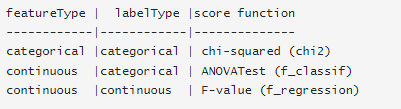

In [101]:
# from pyspark.ml.feature import UnivariateFeatureSelector

# selector = UnivariateFeatureSelector(featuresCol="features", outputCol="selectedFeatures",
#                                     labelCol="label", selectionMode="numTopFeatures")

# selector.setFeatureType("continuous").setLabelType("categorical").setSelectionThreshold(1)

# result = selector.fit(df).transform(df)

# result.show()

## VarianceThresholdSelector - Elimina features com baixa variancia

<p> Se selecionarmos uma varianceThreshold=8.0, só sobrarão as features com variancia acima de 8 </p>

In [103]:
# from pyspark.ml.feature import VarianceThresholdSelector

# selector = VarianceThresholdSelector(varianceThreshold=8.0, outputCol="selectedFeatures")

# result = selector.fit(df).transform(df)

# selector.getVarianceThreshold()

# Modelos Classificação

## Utilidades

### Indexa o label

In [126]:
# Bom para adicionar indice ao nosso Label
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

### Indexa as features

In [127]:
# Adiciona indice aos nossos dados categoricos
featureIndexeer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

### Splita os dados

In [ ]:
# Separa os dados treino e test
(trainingData, testData) = data.randomSplit([0.7, 0.3])

### Divide o pipeline

In [ ]:
# Executa cada estágio do processamento
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

### Testa as metricas

In [ ]:
# Calcula nosso erro do modelo com base no previsto x verdadeiro
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

## Logistic Regression

<p> Pode ser binomial ou Multinomial </p>

In [37]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import LogisticRegression

# Criando Dataset
df = spark.createDataFrame([
    (1.0, Vectors.dense([0.0, 1.1, 0.1])),
    (0.0, Vectors.dense([2.0, 1.0, -1.0])),
    (0.0, Vectors.dense([2.0, 1.3, 1.0])),
    (1.0, Vectors.dense([0.0, 1.2, -0.5])),
    (1.0, Vectors.dense([-1.0, 1.5, 1.3])),
    (0.0, Vectors.dense([3.0, 2.0, -0.1])),
    (1.0, Vectors.dense([0.0, 2.2, -1.5]))], ["label", "features"])

# Dividindo Dados Treino e Test
(train,test) = df.randomSplit([0.7,0.3])

# Criando modelo
lr = LogisticRegression(maxIter=10, regParam=0.01, family="multinomial") # 

# Treinando o modelo
model1 = lr.fit(train)

# Fazendo predict
prediction = model1.transform(test)

# prediction
result = prediction.select('features','label','probability','prediction').collect()
for row in result:
    print("features=%s, label=%s -> prob=%s, prediction=%s"
          % (row.features, row.label, row.probability, row.prediction))

features=[2.0,1.0,-1.0], label=0.0 -> prob=[0.6849075636029445,0.3150924363970555], prediction=0.0
features=[3.0,2.0,-0.1], label=0.0 -> prob=[0.950925048693743,0.04907495130625703], prediction=0.0


In [123]:
# model1.summary estatistica de falsos negativos e positivos

## Decision Tree

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the data stored in LIBSVM format as a DataFrame.
data = spark.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[2]
# summary only
print(treeModel)

## RF

In [128]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load and parse the data file, converting it to a DataFrame.
data = spark.read.format("libsvm").load("C:/BigDataLocalSetup/spark/data/mllib/sample_libsvm_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10)

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("predictedLabel", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

rfModel = model.stages[2]
print(rfModel)  # summary only

+--------------+-----+--------------------+
|predictedLabel|label|            features|
+--------------+-----+--------------------+
|           0.0|  0.0|(692,[98,99,100,1...|
|           0.0|  0.0|(692,[121,122,123...|
|           0.0|  0.0|(692,[124,125,126...|
|           0.0|  0.0|(692,[124,125,126...|
|           0.0|  0.0|(692,[126,127,128...|
+--------------+-----+--------------------+
only showing top 5 rows

Test Error = 0
RandomForestClassificationModel: uid=RandomForestClassifier_c05892f10821, numTrees=10, numClasses=2, numFeatures=692


## Gradient Boosted Tree

In [129]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load and parse the data file, converting it to a DataFrame.
data = spark.read.format("libsvm").load("C:/BigDataLocalSetup/spark/data/mllib/sample_libsvm_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)
# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a GBT model.
gbt = GBTClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxIter=10)

# Chain indexers and GBT in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, gbt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

gbtModel = model.stages[2]
print(gbtModel)  # summary only

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         1.0|(692,[98,99,100,1...|
|       1.0|         1.0|(692,[100,101,102...|
|       1.0|         1.0|(692,[121,122,123...|
|       1.0|         1.0|(692,[123,124,125...|
|       1.0|         1.0|(692,[123,124,125...|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0.0571429
GBTClassificationModel: uid = GBTClassifier_baf93ca2ac15, numTrees=10, numClasses=2, numFeatures=692


## Perceptron
<p>Outro jeito de testar as metricas e splitar os dados</p>

In [130]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load training data
data = spark.read.format("libsvm")\
    .load("C:/BigDataLocalSetup/spark/data/mllib/sample_multiclass_classification_data.txt")

# Split the data into train and test
splits = data.randomSplit([0.6, 0.4], 1234)
train = splits[0]
test = splits[1]

# specify layers for the neural network:
# input layer of size 4 (features), two intermediate of size 5 and 4
# and output of size 3 (classes)
layers = [4, 5, 4, 3]

# create the trainer and set its parameters
trainer = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234)

# train the model
model = trainer.fit(train)

# compute accuracy on the test set
result = model.transform(test)
predictionAndLabels = result.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))

Test set accuracy = 0.9523809523809523


## SVC

In [ ]:
# from pyspark.ml.classification import LinearSVC
# lsvc = LinearSVC(maxIter=10, regParam=0.1)

## Naive Bayes

In [133]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load training data
data = spark.read.format("libsvm") \
    .load("C:/BigDataLocalSetup/spark/data/mllib/sample_libsvm_data.txt")

# Split the data into train and test
splits = data.randomSplit([0.6, 0.4], 1234)
train = splits[0]
test = splits[1]

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# train the model
model = nb.fit(train)

# select example rows to display.
predictions = model.transform(test)
predictions.show()

# compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

+-----+--------------------+--------------------+-----------+----------+
|label|            features|       rawPrediction|probability|prediction|
+-----+--------------------+--------------------+-----------+----------+
|  0.0|(692,[95,96,97,12...|[-172664.79564650...|  [1.0,0.0]|       0.0|
|  0.0|(692,[98,99,100,1...|[-176279.15054306...|  [1.0,0.0]|       0.0|
|  0.0|(692,[122,123,124...|[-189600.55409526...|  [1.0,0.0]|       0.0|
|  0.0|(692,[124,125,126...|[-274673.88337431...|  [1.0,0.0]|       0.0|
|  0.0|(692,[124,125,126...|[-183393.03869049...|  [1.0,0.0]|       0.0|
|  0.0|(692,[125,126,127...|[-256992.48807619...|  [1.0,0.0]|       0.0|
|  0.0|(692,[126,127,128...|[-210411.53649773...|  [1.0,0.0]|       0.0|
|  0.0|(692,[127,128,129...|[-170627.63616681...|  [1.0,0.0]|       0.0|
|  0.0|(692,[127,128,129...|[-212157.96750469...|  [1.0,0.0]|       0.0|
|  0.0|(692,[127,128,129...|[-183253.80108550...|  [1.0,0.0]|       0.0|
|  0.0|(692,[128,129,130...|[-246528.93739632...|  

# Modelos de Regressão

## Regressão Linear
<p> O regParam define o alpha e elasticNetParam se 1 = Lasso se 0 = Ridge </p>

In [134]:
from pyspark.ml.regression import LinearRegression

# Load training data
training = spark.read.format("libsvm")\
    .load("C:/BigDataLocalSetup/spark/data/mllib/sample_linear_regression_data.txt")

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.0,0.32292516677405936,-0.3438548034562218,1.9156017023458414,0.05288058680386263,0.765962720459771,0.0,-0.15105392669186682,-0.21587930360904642,0.22025369188813426]
Intercept: 0.1598936844239736
numIterations: 7
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.4936361664340463, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]
+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053554|
|  -5.204019455758823|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719486|
|  -10.00431602969873|
|   2.062397807050484|
|  3.1117508432954772|
| -15.893608229419382|
|  -5.036284254673026|
|   6.483215876994333|
|  12.429497299109002|
|  -20.32003219007654|
| -2.0049838218725005|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


## Decision tree

In [137]:
# from pyspark.ml.regression import DecisionTreeRegressor
# dt = DecisionTreeRegressor(featuresCol="indexedFeatures")

## RF

In [138]:
# from pyspark.ml.regression import RandomForestRegressor
# rf = RandomForestRegressor(featuresCol="indexedFeatures")


## GBT regressor

In [139]:
# from pyspark.ml.regression import GBTRegressor
# gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=10)

## Isotonic regression


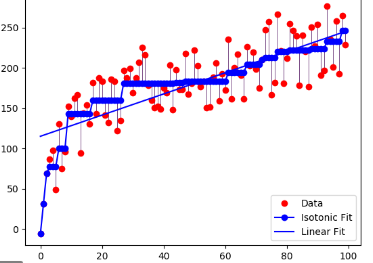

In [141]:
# from pyspark.ml.regression import IsotonicRegression
# model = IsotonicRegression().fit(dataset)

# OneVsRest 
<p> Para cada classe perante as outras duas é criado um modelo </p> 
<p> OneVsRest é utilizada para modelos binários, como perceptron, logistic regression e SVM </p>

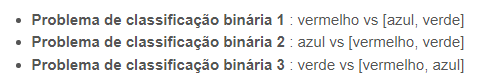


# Clustering

## Kmeans
<p> SetK() define o numero de clusters, clustering evaluator retorna o grau de silhouette. </p>

In [143]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = spark.read.format("libsvm").load("C:/BigDataLocalSetup/spark/data/mllib/sample_kmeans_data.txt")

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.9997530305375207
Cluster Centers: 
[9.1 9.1 9.1]
[0.1 0.1 0.1]


In [144]:
dataset.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|           (3,[],[])|
|  1.0|(3,[0,1,2],[0.1,0...|
|  2.0|(3,[0,1,2],[0.2,0...|
|  3.0|(3,[0,1,2],[9.0,9...|
|  4.0|(3,[0,1,2],[9.1,9...|
|  5.0|(3,[0,1,2],[9.2,9...|
+-----+--------------------+



In [145]:
predictions.show()

+-----+--------------------+----------+
|label|            features|prediction|
+-----+--------------------+----------+
|  0.0|           (3,[],[])|         1|
|  1.0|(3,[0,1,2],[0.1,0...|         1|
|  2.0|(3,[0,1,2],[0.2,0...|         1|
|  3.0|(3,[0,1,2],[9.0,9...|         0|
|  4.0|(3,[0,1,2],[9.1,9...|         0|
|  5.0|(3,[0,1,2],[9.2,9...|         0|
+-----+--------------------+----------+



## GMM (Gaussian Mixture Model)
<p> O gmm tem o centroide, a forma do cluster, e a probabilidade de cada amostra pertencer a cada cluster </p>

In [149]:
from pyspark.ml.clustering import GaussianMixture

# loads data
dataset = spark.read.format("libsvm").load("C:/BigDataLocalSetup/spark/data/mllib/sample_kmeans_data.txt")

gmm = GaussianMixture().setK(2).setSeed(538009335)
model = gmm.fit(dataset)

print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.show(truncate=False)

Gaussians shown as a DataFrame: 
+-------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|mean                                                         |cov                                                                                                                                                                                                     |
+-------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[0.10000000000001552,0.10000000000001552,0.10000000000001552]|0.006666666666806454  0.006666666666806454  0.006666666666806454  
0.006666666666806454  0.006666666666806454

In [151]:
dataset.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|           (3,[],[])|
|  1.0|(3,[0,1,2],[0.1,0...|
|  2.0|(3,[0,1,2],[0.2,0...|
|  3.0|(3,[0,1,2],[9.0,9...|
|  4.0|(3,[0,1,2],[9.1,9...|
|  5.0|(3,[0,1,2],[9.2,9...|
+-----+--------------------+



In [150]:
model.transform(dataset).show()

+-----+--------------------+--------------------+----------+
|label|            features|         probability|prediction|
+-----+--------------------+--------------------+----------+
|  0.0|           (3,[],[])|[0.99999999999999...|         0|
|  1.0|(3,[0,1,2],[0.1,0...|[0.99999999999999...|         0|
|  2.0|(3,[0,1,2],[0.2,0...|[0.99999999999999...|         0|
|  3.0|(3,[0,1,2],[9.0,9...|[2.09399616965737...|         1|
|  4.0|(3,[0,1,2],[9.1,9...|[9.89133752130383...|         1|
|  5.0|(3,[0,1,2],[9.2,9...|[2.09399616965838...|         1|
+-----+--------------------+--------------------+----------+



## Bisecting k-means - Hierarquico

In [154]:
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = spark.read.format("libsvm").load("C:/BigDataLocalSetup/spark/data/mllib/sample_kmeans_data.txt")

# Trains a bisecting k-means model.
bkm = BisectingKMeans().setK(2).setSeed(1)
model = bkm.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
print("Cluster Centers: ")
centers = model.clusterCenters()
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.9997530305375207
Cluster Centers: 
[0.1 0.1 0.1]
[9.1 9.1 9.1]


# Sistemas De Recomendação

## Filtragem Colaborativo com ALS

In [156]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

lines = spark.read.text("C:/BigDataLocalSetup/spark/data/mllib/als/sample_movielens_ratings.txt").rdd
parts = lines.map(lambda row: row.value.split("::"))
ratingsRDD = parts.map(lambda p: Row(userId=int(p[0]), movieId=int(p[1]),
                                     rating=float(p[2]), timestamp=int(p[3])))
ratings = spark.createDataFrame(ratingsRDD)
(training, test) = ratings.randomSplit([0.8, 0.2])

# Build the recommendation model using ALS on the training data
# Note we set cold start strategy to 'drop' to ensure we don't get NaN evaluation metrics
als = ALS(maxIter=5, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating",
          coldStartStrategy="drop")
model = als.fit(training)

# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(test)


In [157]:
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))


Root-mean-square error = 1.7853554317292155


In [159]:
# Recomendação de filme por usuário 
userRecs = model.recommendForAllUsers(10)
userRecs.rdd.collect()

[Row(userId=28, recommendations=[Row(movieId=12, rating=5.168105125427246), Row(movieId=92, rating=5.1415534019470215), Row(movieId=46, rating=4.8725433349609375), Row(movieId=81, rating=4.628129959106445), Row(movieId=61, rating=3.9337821006774902), Row(movieId=19, rating=3.924104690551758), Row(movieId=89, rating=3.918444871902466), Row(movieId=82, rating=3.9150307178497314), Row(movieId=49, rating=3.9139597415924072), Row(movieId=2, rating=3.900455951690674)]),
 Row(userId=26, recommendations=[Row(movieId=74, rating=6.002131462097168), Row(movieId=88, rating=5.52296257019043), Row(movieId=18, rating=5.307307720184326), Row(movieId=7, rating=4.951684474945068), Row(movieId=94, rating=4.85136079788208), Row(movieId=22, rating=4.8247389793396), Row(movieId=23, rating=4.815576076507568), Row(movieId=87, rating=4.736738681793213), Row(movieId=24, rating=4.6569061279296875), Row(movieId=32, rating=4.479640960693359)]),
 Row(userId=27, recommendations=[Row(movieId=96, rating=4.486356258392

In [160]:
# Recomendação de usuarios para filmes
movieRecs = model.recommendForAllItems(10)
movieRecs.show()

+-------+--------------------+
|movieId|     recommendations|
+-------+--------------------+
|     31|[[23, 4.4354777],...|
|     85|[[8, 5.043523], [...|
|     65|[[23, 4.883825], ...|
|     53|[[21, 4.7205772],...|
|     78|[[26, 1.523799], ...|
|     34|[[2, 4.0054784], ...|
|     81|[[28, 4.62813], [...|
|     28|[[1, 2.8289716], ...|
|     76|[[24, 4.9223356],...|
|     26|[[11, 5.374536], ...|
|     27|[[23, 5.144758], ...|
|     44|[[18, 3.8378332],...|
|     12|[[28, 5.168105], ...|
|     91|[[28, 3.6215198],...|
|     22|[[22, 5.5905066],...|
|     93|[[2, 5.3356934], ...|
|     47|[[7, 3.8056734], ...|
|      1|[[2, 1.4690976], ...|
|     52|[[24, 5.118844], ...|
|     13|[[11, 3.7176383],...|
+-------+--------------------+
only showing top 20 rows



In [161]:
# Recomendação para usuarios especificos
users = ratings.select(als.getUserCol()).distinct().limit(3)
userSubsetRecs = model.recommendForUserSubset(users, 10)
userSubsetRecs.show()

+------+--------------------+
|userId|     recommendations|
+------+--------------------+
|    26|[[74, 6.0021315],...|
|    19|[[35, 4.597347], ...|
|    29|[[46, 5.046328], ...|
+------+--------------------+



In [162]:
# Recomendação para filmes especificos
# Generate top 10 user recommendations for a specified set of movies
movies = ratings.select(als.getItemCol()).distinct().limit(3)
movieSubSetRecs = model.recommendForItemSubset(movies, 10)
movieSubSetRecs.show()

+-------+--------------------+
|movieId|     recommendations|
+-------+--------------------+
|     65|[[23, 4.883825], ...|
|     26|[[11, 5.374536], ...|
|     29|[[8, 5.1986885], ...|
+-------+--------------------+



## Market Basket produtos frequentemente comprados juntos
<p> minSupport: o suporte mínimo para que um conjunto de itens seja identificado como frequente. Por exemplo, se um item aparece em 3 de 5 transações, ele tem um suporte de 3/5 = 0,6.
    
minConfidence: confiança mínima para gerar regra de associação. A confiança é uma indicação de quantas vezes uma regra de associação foi considerada verdadeira. Por exemplo, se no conjunto de itens de transações Xaparecer 4 vezes X e Yco-ocorrer apenas 2 vezes, a confiança da regra X => Yserá 2/4 = 0,5. O parâmetro não afetará a mineração para conjuntos de itens frequentes, mas especifica a confiança mínima para gerar regras de associação de conjuntos de itens frequentes.</p>



In [163]:
from pyspark.ml.fpm import FPGrowth

df = spark.createDataFrame([
    (0, [1, 2, 5]),
    (1, [1, 2, 3, 5]),
    (2, [1, 2])
], ["id", "items"])

fpGrowth = FPGrowth(itemsCol="items", minSupport=0.5, minConfidence=0.6) 
model = fpGrowth.fit(df)

# Frequencia dos itens
model.freqItemsets.show()

# Proximos itens e probabilidade
model.associationRules.show()

# Itens que vão ser comprados em seguida
model.transform(df).show()

+---------+----+
|    items|freq|
+---------+----+
|      [1]|   3|
|      [2]|   3|
|   [2, 1]|   3|
|      [5]|   2|
|   [5, 2]|   2|
|[5, 2, 1]|   2|
|   [5, 1]|   2|
+---------+----+

+----------+----------+------------------+----+
|antecedent|consequent|        confidence|lift|
+----------+----------+------------------+----+
|       [5]|       [2]|               1.0| 1.0|
|       [5]|       [1]|               1.0| 1.0|
|    [5, 2]|       [1]|               1.0| 1.0|
|       [1]|       [2]|               1.0| 1.0|
|       [1]|       [5]|0.6666666666666666| 1.0|
|    [2, 1]|       [5]|0.6666666666666666| 1.0|
|    [5, 1]|       [2]|               1.0| 1.0|
|       [2]|       [1]|               1.0| 1.0|
|       [2]|       [5]|0.6666666666666666| 1.0|
+----------+----------+------------------+----+

+---+------------+----------+
| id|       items|prediction|
+---+------------+----------+
|  0|   [1, 2, 5]|        []|
|  1|[1, 2, 3, 5]|        []|
|  2|      [1, 2]|       [5]|
+---+--

## PrefixSpan Exibe a frequencia que os padrões se repetem
<p>
minSupport: o suporte mínimo necessário para ser considerado um padrão sequencial frequente.

maxPatternLength: o comprimento máximo de um padrão sequencial frequente. Qualquer padrão frequente que exceda este comprimento não será incluído nos resultados.

maxLocalProjDBSize: o número máximo de itens permitidos em um banco de dados projetado com prefixo antes que o processamento iterativo local do banco de dados projetado comece. Este parâmetro deve ser ajustado em relação ao tamanho de seus executores.

sequenceCol: o nome da coluna de sequência no conjunto de dados (“sequência” padrão), as linhas com nulos nesta coluna são ignoradas.</p>

In [164]:
from pyspark.ml.fpm import PrefixSpan

df = sc.parallelize([Row(sequence=[[1, 2], [3]]),
                     Row(sequence=[[1], [3, 2], [1, 2]]),
                     Row(sequence=[[1, 2], [5]]),
                     Row(sequence=[[6]])]).toDF()

prefixSpan = PrefixSpan(minSupport=0.5, maxPatternLength=5,
                        maxLocalProjDBSize=32000000)

# Find frequent sequential patterns.
prefixSpan.findFrequentSequentialPatterns(df).show()

+----------+----+
|  sequence|freq|
+----------+----+
|     [[1]]|   3|
|     [[2]]|   3|
|     [[3]]|   2|
|  [[1, 2]]|   3|
|[[1], [3]]|   2|
+----------+----+



# GRID SEARCH E CROSS VALIDATOR

In [167]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Prepare training documents, which are labeled.
training = spark.createDataFrame([
    (0, "a b c d e spark", 1.0),
    (1, "b d", 0.0),
    (2, "spark f g h", 1.0),
    (3, "hadoop mapreduce", 0.0),
    (4, "b spark who", 1.0),
    (5, "g d a y", 0.0),
    (6, "spark fly", 1.0),
    (7, "was mapreduce", 0.0),
    (8, "e spark program", 1.0),
    (9, "a e c l", 0.0),
    (10, "spark compile", 1.0),
    (11, "hadoop software", 0.0)
], ["id", "text", "label"])

# Configure an ML pipeline, which consists of tree stages: tokenizer, hashingTF, and lr.
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
lr = LogisticRegression(maxIter=10)
pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

# We now treat the Pipeline as an Estimator, wrapping it in a CrossValidator instance.
# This will allow us to jointly choose parameters for all Pipeline stages.
# A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
# We use a ParamGridBuilder to construct a grid of parameters to search over.
# With 3 values for hashingTF.numFeatures and 2 values for lr.regParam,
# this grid will have 3 x 2 = 6 parameter settings for CrossValidator to choose from.
paramGrid = ParamGridBuilder() \
    .addGrid(hashingTF.numFeatures, [10, 100, 1000]) \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=2)  # use 3+ folds in practice

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(training)

# Prepare test documents, which are unlabeled.
test = spark.createDataFrame([
    (4, "spark i j k"),
    (5, "l m n"),
    (6, "mapreduce spark"),
    (7, "apache hadoop")
], ["id", "text"])

# Make predictions on test documents. cvModel uses the best model found (lrModel).
prediction = cvModel.transform(test)
selected = prediction.select("id", "text", "probability", "prediction")
for row in selected.collect():
    print(row)

Row(id=4, text='spark i j k', probability=DenseVector([0.2661, 0.7339]), prediction=1.0)
Row(id=5, text='l m n', probability=DenseVector([0.9209, 0.0791]), prediction=0.0)
Row(id=6, text='mapreduce spark', probability=DenseVector([0.4429, 0.5571]), prediction=1.0)
Row(id=7, text='apache hadoop', probability=DenseVector([0.8584, 0.1416]), prediction=0.0)


In [198]:
cvModel.avgMetrics

[0.765625, 0.609375, 0.625, 0.625, 0.96875, 0.96875]

In [199]:
paramGrid

[{Param(parent='HashingTF_f55a1fb171ce', name='numFeatures', doc='Number of features. Should be greater than 0.'): 10,
  Param(parent='LogisticRegression_b2553888b618', name='regParam', doc='regularization parameter (>= 0).'): 0.1},
 {Param(parent='HashingTF_f55a1fb171ce', name='numFeatures', doc='Number of features. Should be greater than 0.'): 10,
  Param(parent='LogisticRegression_b2553888b618', name='regParam', doc='regularization parameter (>= 0).'): 0.01},
 {Param(parent='HashingTF_f55a1fb171ce', name='numFeatures', doc='Number of features. Should be greater than 0.'): 100,
  Param(parent='LogisticRegression_b2553888b618', name='regParam', doc='regularization parameter (>= 0).'): 0.1},
 {Param(parent='HashingTF_f55a1fb171ce', name='numFeatures', doc='Number of features. Should be greater than 0.'): 100,
  Param(parent='LogisticRegression_b2553888b618', name='regParam', doc='regularization parameter (>= 0).'): 0.01},
 {Param(parent='HashingTF_f55a1fb171ce', name='numFeatures', doc

In [208]:
for i in zip(cvModel.avgMetrics,paramGrid):
    print(i)

(0.765625, {Param(parent='HashingTF_f55a1fb171ce', name='numFeatures', doc='Number of features. Should be greater than 0.'): 10, Param(parent='LogisticRegression_b2553888b618', name='regParam', doc='regularization parameter (>= 0).'): 0.1})
(0.609375, {Param(parent='HashingTF_f55a1fb171ce', name='numFeatures', doc='Number of features. Should be greater than 0.'): 10, Param(parent='LogisticRegression_b2553888b618', name='regParam', doc='regularization parameter (>= 0).'): 0.01})
(0.625, {Param(parent='HashingTF_f55a1fb171ce', name='numFeatures', doc='Number of features. Should be greater than 0.'): 100, Param(parent='LogisticRegression_b2553888b618', name='regParam', doc='regularization parameter (>= 0).'): 0.1})
(0.625, {Param(parent='HashingTF_f55a1fb171ce', name='numFeatures', doc='Number of features. Should be greater than 0.'): 100, Param(parent='LogisticRegression_b2553888b618', name='regParam', doc='regularization parameter (>= 0).'): 0.01})
(0.96875, {Param(parent='HashingTF_f55

# Train Test Com Grid Search

In [210]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

# Prepare training and test data.
data = spark.read.format("libsvm")\
    .load("C:/BigDataLocalSetup/spark/data/mllib/sample_linear_regression_data.txt")
train, test = data.randomSplit([0.9, 0.1], seed=12345)

lr = LinearRegression(maxIter=10)

# We use a ParamGridBuilder to construct a grid of parameters to search over.
# TrainValidationSplit will try all combinations of values and determine best model using
# the evaluator.
paramGrid = ParamGridBuilder()\
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.fitIntercept, [False, True])\
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])\
    .build()

# In this case the estimator is simply the linear regression.
# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
tvs = TrainValidationSplit(estimator=lr,
                           estimatorParamMaps=paramGrid,
                           evaluator=RegressionEvaluator(),
                           # 80% of the data will be used for training, 20% for validation.
                           trainRatio=0.8)

# Run TrainValidationSplit, and choose the best set of parameters.
model = tvs.fit(train)

# Make predictions on test data. model is the model with combination of parameters
# that performed best.
model.transform(test)\
    .select("features", "label", "prediction")\
    .show()

+--------------------+--------------------+--------------------+
|            features|               label|          prediction|
+--------------------+--------------------+--------------------+
|(10,[0,1,2,3,4,5,...| -17.026492264209548| -1.7800622423486911|
|(10,[0,1,2,3,4,5,...|  -16.71909683360509| -0.1893325701092588|
|(10,[0,1,2,3,4,5,...| -15.375857723312297|  0.7252323736487188|
|(10,[0,1,2,3,4,5,...| -13.772441561702871|  3.2696413241677718|
|(10,[0,1,2,3,4,5,...| -13.039928064104615| 0.18817684046065764|
|(10,[0,1,2,3,4,5,...|   -9.42898793151394|  -3.449987079269568|
|(10,[0,1,2,3,4,5,...|    -9.2679651250406| -0.3310907549069632|
|(10,[0,1,2,3,4,5,...|  -9.173693798406978|-0.42727135281551937|
|(10,[0,1,2,3,4,5,...| -7.1500991588127265|   2.936884251408867|
|(10,[0,1,2,3,4,5,...|  -6.930603551528371|-0.02839768193150...|
|(10,[0,1,2,3,4,5,...|  -6.456944198081549| -0.9224776887934015|
|(10,[0,1,2,3,4,5,...| -3.2843694575334834| -1.0821208483033875|
|(10,[0,1,2,3,4,5,...|   